## Exploring business recommendation possibilities

In [59]:
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_gross = pd.read_csv('../data/cleaned_movie_gross.csv', index_col=0)
df_budgets = pd.read_csv('../data/cleaned_budgets.csv', index_col=0)
df_movies = pd.read_csv('../data/cleaned_movies.csv', index_col=0)
conn = sqlite3.connect('../data/im.db')

In [3]:
df_gross

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.00,652000000,2010
Alice in Wonderland (2010),BV,334200000.00,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
Inception,WB,292600000.00,535700000,2010
Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.00,NaN,2018
Edward II (2018 re-release),FM,4800.00,NaN,2018
El Pacto,Sony,2500.00,NaN,2018


df_gross and df_budgets seem to essentially store the same data, though df_gross has the added row of studio. We'll look at the budgets table two ways, one looking at the return_ratio and another at the raw gross number

In [4]:
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
df_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_ratio
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,5.53
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.57
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.15
...,...,...,...,...,...,...
77,2004-12-31,The Mongol King,7000,900,900,-0.87
78,2018-12-31,Red 11,7000,0,0,-1.00
80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-0.73


In [49]:
df_high_return = df_budgets.sort_values('return_ratio', ascending=False).head(20)
df_high_return.mean(numeric_only=True)

production_budget    1081655.00
domestic_gross      49637442.20
worldwide_gross     86913161.85
return_ratio             136.39
dtype: float64

In [45]:
df_high_gross = df_budgets.sort_values('worldwide_gross', ascending=False).head(20)
df_high_gross.mean(numeric_only=True)

production_budget    217080000.00
domestic_gross       509391552.15
worldwide_gross     1454594828.85
return_ratio                 6.46
dtype: float64

When comparing the averages we can see that there is a pretty disparity between the highest grossing, and the highest return ratio movies. The highest return ratio movies average a significantly lower production budget while the opposite is true for the highest grossing movies. Since we are a new studio, I think it is a good idea to pay attention to the lower production budget movies with a high return ratio. 

In [58]:
df_top_return = df_budgets.sort_values('return_ratio', ascending=False)
df_top_return = df_top_return[(df_top_return['production_budget'] < 1500000) & (df_top_return['worldwide_gross'] > 0) & (df_top_return['return_ratio'] > 2)]
top_return_movies = df_top_return['movie'].to_list()
df_top_return

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_ratio
id,,,,,,
93,2009-09-25,Paranormal Activity,450000,107918810,194183034,430.52
80,2015-07-10,The Gallows,100000,22764410,41656474,415.56
10,2004-05-07,Super Size Me,65000,11529368,22233808,341.06
82,2005-08-05,My Date With Drew,1100,181041,181041,163.58
57,2007-05-16,Once,150000,9445857,23323631,154.49
...,...,...,...,...,...,...
39,2006-09-01,Mutual Appreciation,30000,103509,103509,2.45
41,2014-06-06,Obvious Child,1000000,3122616,3324070,2.32
68,2012-04-27,Sound of My Voice,135000,408015,429448,2.18


Since we're looking at the movies with the highest returns, we'll also filter on a max of 1,000,000 for budget since that was the average for the top 20 highest return movies. The movies will also need to have a return_ratio greater than 1.

In [53]:
high_return_movies = df_high_return['movie'].to_list()
high_gross_movies = df_high_gross['movie'].to_list()

In [9]:
df_budgets['release_date'].groupby(df_budgets.release_date.dt.year).count()

release_date
2000    189
2001    181
2002    210
2003    201
2004    206
2005    223
2006    260
2007    220
2008    264
2009    239
2010    274
2011    254
2012    235
2013    238
2014    255
2015    338
2016    219
2017    168
2018    143
2019     67
2020      3
Name: release_date, dtype: int64

We can also see that this dataset when grouped by years, has less movies in recent years. This could very well be a limitation of the dataset, but we can also see that the number starts decreasing at around 2015. This could be a result of streaming services being more enticing to studios and as a result releasing less movies in theaters. 

Next we will look at the sql database so that we can see if we can get more data for each movie

In [10]:
pd.read_sql(
"""
SELECT name
FROM sqlite_master
WHERE type='table'            
""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Given the top return movies from above, if we look for those from the sql database, the genres column could be a useful entrant.

In [54]:
#Get the rows that exist in the list from above
query = "SELECT * FROM movie_basics WHERE primary_title in " + str(tuple(top_return_movies))

pd.read_sql(query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0326592,The Overnight,The Overnight,2010,88.00,None
1,tt10227710,Brick,Brick,2019,93.00,"Drama,Family,Romance"
2,tt1120985,Blue Valentine,Blue Valentine,2010,112.00,"Drama,Romance"
3,tt1366338,Lowriders,Lowriders,2016,98.00,"Adventure,Crime,Drama"
4,tt1441326,Martha Marcy May Marlene,Martha Marcy May Marlene,2011,102.00,"Drama,Mystery,Thriller"
...,...,...,...,...,...,...
78,tt8681390,Like Crazy,Like Crazy,2018,NaN,Drama
79,tt8883462,Home,Home,2017,NaN,"Drama,Family"
80,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller
81,tt9281490,Home,Home,2018,50.00,Documentary


In [41]:
pd.read_sql(
"""
SELECT *
FROM movie_basics     
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [55]:
#Get the genres as a list
genre_count = pd.read_sql(query, conn)['genres'].str.split(',').to_list()
#Create a dictionary of genres and their counts, ignore occasional none values
genre_dict = {}
for genres in genre_count:
    if genres != None:
        for genre in genres:
            if genre in genre_dict:
                genre_dict[genre] += 1
            else:
                genre_dict[genre] = 1

In [56]:
genre_dict = dict(sorted(genre_dict.items(), key=lambda item: item[1], reverse=True))
genre_dict

{'Drama': 43,
 'Comedy': 18,
 'Documentary': 17,
 'Romance': 16,
 'Horror': 14,
 'Thriller': 11,
 'Mystery': 9,
 'Family': 5,
 'Sci-Fi': 5,
 'Biography': 5,
 'Crime': 4,
 'Action': 4,
 'Adventure': 3,
 'History': 3,
 'Animation': 2,
 'Fantasy': 1,
 'War': 1}

Dramas are the most common

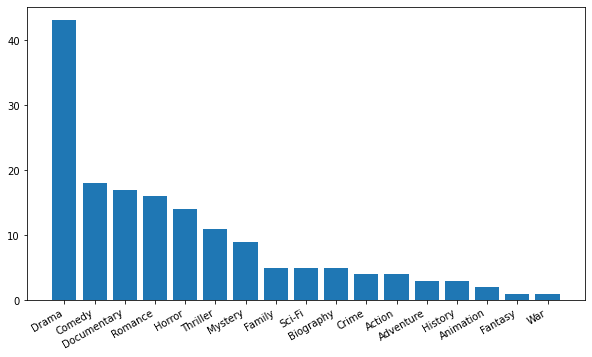

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(genre_dict.keys(), genre_dict.values())
fig.autofmt_xdate()

In [35]:
pd.read_sql(
"""
SELECT *
from movie_ratings
join movie_basics
using(movie_id)
where primary_title in 
"""+ str(tuple(top_return_movies)), conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0326592,7.50,24,The Overnight,The Overnight,2010,88.00,None
1,tt1366338,5.70,1954,Lowriders,Lowriders,2016,98.00,"Adventure,Crime,Drama"
2,tt1470827,6.40,84332,Monsters,Monsters,2010,94.00,"Drama,Sci-Fi,Thriller"
3,tt1544600,6.60,2488,The Grace Card,The Grace Card,2010,101.00,Drama
4,tt1549572,7.00,85839,Another Earth,Another Earth,2011,92.00,"Drama,Romance,Sci-Fi"
5,tt1570989,6.20,13397,Tiny Furniture,Tiny Furniture,2010,98.00,"Comedy,Drama,Romance"
6,tt1714210,7.60,25424,Weekend,Weekend,2011,97.00,"Drama,Romance"
7,tt1742336,6.70,24780,Your Sister's Sister,Your Sister's Sister,2011,90.00,"Comedy,Drama"
8,tt1748207,6.60,19387,Sound of My Voice,Sound of My Voice,2011,85.00,"Drama,Mystery,Sci-Fi"
9,tt1758692,6.70,55841,Like Crazy,Like Crazy,2011,86.00,"Drama,Romance"


In [36]:
df_movies[df_movies['original_title'].isin(top_return_movies)]

,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,
43933,en,Monsters,10.18,2010-10-29,Monsters,6.20,848
47607,en,Tiny Furniture,6.70,2010-11-12,Tiny Furniture,5.90,82
60420,en,Like Crazy,10.09,2011-10-28,Like Crazy,6.50,638
55420,en,Another Earth,10.03,2011-07-22,Another Earth,6.70,853
79120,en,Weekend,8.33,2011-09-22,Weekend,7.50,287
86812,en,Sound of My Voice,7.21,2011-01-22,Sound of My Voice,6.40,169
74510,en,Kevin Hart: Laugh at My Pain,6.56,2011-09-09,Kevin Hart: Laugh at My Pain,7.40,76
54897,en,The Grace Card,2.14,2011-02-25,The Grace Card,6.50,18
467930,en,Tadpole,0.62,2011-07-25,Tadpole,5.00,1
